## Game Theory
**FIZ371 - Scientific & Technical Computations | 11/04/2020**

**Game Theory**
* Introduction
   * Battle of Sexes
     * Pay-off table
     * Calculating the probabilities
       * Probability of coordination
       * Probability of miscoordination
       * Expected pay-off for each individual
   * Prisoner's Dilemma
   * Friend or Foe
   * Stag Hunt
   * Choosing Sides (Driving)
   * Party vs. Home
   * Matching Pennies
* Nash Equilibrium
    * Prisoner's Dilemma
    * Stag Hunt
    * Matching Pennies
* References
  
Dr. Emre S. Tasci <emre.tasci@hacettepe.edu.tr>

# Introduction

Game theory deals with possible outcomes and determining strategies while taking into account the opponents' reactions. By game, we imply any conflict where there is a competition. The game can be cooperative/non-cooperative; constant sum, zero sum or non-zero sum; symmetryic or asymmetric. It has many forms and extends from a chess game to a diplomatic decision that can lead to a world war. In the end, game theory is used to analyze a given conundrum/situation and to come up with the decision that will yield the maximum gain.

John Nash was a very influential mathematician who developed an analytical approach to this vast field under the name "game theory" for which he received the Nobel prize for Economics in 1994.

We will start directly with basic cases and analyze them on the way.

## Battle of Sexes
Manny and Wanda have agreed to attend to an event (opera -or- football) alas both of them have forgotten on which option they had agreed and have no means of communication.

To which event should they chose to go?

### Pay-off table
We start by constructing a pay-off table that covers all of the possible situations. In this case, the possibilities are:

* Wanda and Manny both going to the opera
* Wanda going to the opera while Manny goes to the football
* Wanda going to the football while Manny goes to the opera
* Wanda and Mannyn both going to the football match

Wanda and Manny are two good friends, they really love spending time together. Wanda isn't a big fan of football, she prefers opera. Manny enjoys watching football matches alas not so enthusiastic about opera. But, as they enjoy being with each other, they certainly prefer attending to their least favorite activity together than watching their favorite activity by themselves (e.g., even though, when alone, Wanda prefers watching an opera than watching a football match, she'll definitely prefer watching a football match with Manny than watching an opera alone by herself). 

So, in the light of this information, the pay-off table can be something like:

| &nbsp;|$M_O$|$M_F$|
|---|---|---|
|$W_O$|3,2|1,1|
|$W_F$|0,0|2,3|

The ordering is: (pay-off to Wanda, pay-off to Manny)

For example (3,2) for $W_O$ and $M_O$ means that, if Wanda goes to opera ($W_O$) and Manny also goes to opera ($M_O$), Wanda will have 3 units of 'joy', while Manny will have 2 units of 'joy'. However, if Wanda goes to the opera while Manny goes to the football match, each of them will only get 1 unit of 'joy'.



### Calculating the probabilities
The probability that each of them will be at a specific event is naturally ruled by the expected pay-off (they are trying to maximize the joy they will receive). We will be using $M_F$, $M_O$, $W_F$ and $W_O$ to represent the probability that Manny will go to the football match($M_F$), opera($M_O$); Wanda going to the football($W_F$) or opera($W_O$), respectively. Then, taking into account of the pay-offs, we can formulate:

$$M_F=\frac{1\,.W_O + 3\,.W_F}{1\,.W_O + 3\,.W_F+2\,.W_O+0\,.W_F}$$

Let's break-down the factors: the 1 before $W_O$ in the numerator is the pay-off for Manny should he goes to the football game when Wanda has gone to the opera and 3 before the $W_F$ is the joy he gets when he goes to the football game and finds out that Wanda is also there!

The denominator is the total pay-off sum of all the possibilities for Manny (_mathematically speaking_, it's actually the normalizing constant so we can treat $M_F$ as a probability).

$$M_F=\frac{W_O + 3W_F}{3W_O + 3W_F}=\frac{W_O + 3W_F}{3\underbrace{\left(W_O + W_F\right)}_{W_O + W_F=1}}=\frac{1}{3}(W_O + 3W_F) $$

Here, we used the fact that $W_O + W_F=1$ as $W_O$ is the probability that Wanda will go to the opera and $W_F$ is the probability that she'll go to the football match and as there are no other options, so the sum of these two probabilities must be equal to 1.

Proceeding similarly onto the other probabilities:

\begin{align*}
M_O &= \frac{2W_O+0W_F}{2W_O+0W_F+1W_O+3W_F} = \frac{2W_O}{3(W_O+W_F)}=\frac{2W_O}{3}\\
W_F &= \frac{0M_O+2M_F}{0M_O+2M_F+3M_O+1M_F} = \frac{2M_F}{3}\\
W_O &= \frac{3M_O+M_F}{3M_O+M_F+0M_O+2M_F} = \frac{3M_0+M_F}{3}=\frac{1}{3}(3M_O+M_F)
\end{align*}

We have 4 equations for 4 unknowns -- to summarize:
\begin{align*}
M_F &= \frac{1}{3}(W_O + 3W_F)\\
M_O &=\frac{2W_O}{3}\\
W_F &=\frac{2M_F}{3}\\
W_O &= \frac{1}{3}(3M_O+M_F)
\end{align*}

so, in theory, we must be able to solve this linear set of equations:

$$\left(\begin{matrix}
1&0&-1&-1/3\\
2/3&-1&0&0\\
2/3&0&-1&0\\
1/3&1&0&-1\\
\end{matrix}\right)
\left(\begin{matrix}
M_F\\M_O\\W_F\\W_O
\end{matrix}\right)
=\left(\begin{matrix}
0\\0\\0\\0
\end{matrix}\right)
$$

In [23]:
import numpy as np
from fractions import Fraction
A = np.array([[1,0,-1,-1/3],[2/3,-1,0,0],[2/3,0,-1,0],[1/3,1,0,-1]])
b = np.array([[0],[0],[0],[0]])
[MF,MO,WF,WO] = np.linalg.solve(A,b)
print(MF,MO,WF,WO)

[0.] [-0.] [0.] [-0.]


We got a very boring ("trivial") result: set all the probabilities to 0 and then, 0 = 0 (_duh!.._)

This is because we actually don't have 4 independent equations for 4 unknowns, only 3! We can see this fact as, for example, we can derive the 4th row by multiplying the 1st row by 3; 2nd row by -1; 3rd row by -3 and adding them up:

In [51]:
sum = 3*A[0,:] + (-1)*A[1,:]+(-3)*A[2,:]
for i in range(0,4):
   print("%s "%str(Fraction(sum[i]).limit_denominator(10)),end="")
print(" --> we have rederived the 4th row using the first 3!")

1/3 1 0 -1  --> we have rederived the 4th row using the first 3!


So this is an _underdetermined linear set of equations_. 

By the way, we could also deduce that this was an underdetermined set by checking its rank (i.e., the number of independent rows of a matrix):

In [55]:
print("The rank of our A matrix is: %d"%np.linalg.matrix_rank(A))

The rank of our A matrix is: 3


To summarize: At the moment we have 4 unknowns but only 3 independent equations, thus we need a 4th equation. Where can it be found?...

_(think... think...)_


.  
.  
.  

_Any ideas?_...

.  
.  
.  


How about the fact that, since $W_F$ and $W_M$ were the probabilities of Wanda going to the football match or the opera and these were the only possibilities and hence:$$W_F + W_O = 1$$

If we "translate" this into our set of equations as the 5th line:
$$\left(\begin{matrix}
1&0&-1&-1/3\\
2/3&-1&0&0\\
2/3&0&-1&0\\
1/3&1&0&-1\\
0&0&1&1
\end{matrix}\right)
\left(\begin{matrix}
M_F\\M_O\\W_F\\W_O
\end{matrix}\right)
=\left(\begin{matrix}
0\\0\\0\\0\\1
\end{matrix}\right)
$$

(5x4).(4x1) = (5x1) --  the dimensions hold, so we can carry on the multiplication but for the linear solve, we need a square matrix, so we take out one of the first four rows (let's drop the 4th):
$$\left(\begin{matrix}
1&0&-1&-1/3\\
2/3&-1&0&0\\
2/3&0&-1&0\\
0&0&1&1
\end{matrix}\right)
\left(\begin{matrix}
M_F\\M_O\\W_F\\W_O
\end{matrix}\right)
=\left(\begin{matrix}
0\\0\\0\\1
\end{matrix}\right)
$$

In [80]:
import numpy as np
from fractions import Fraction
A = np.array([[1,0,-1,-1/3],[2/3,-1,0,0],[2/3,0,-1,0],[0,0,1,1]])
b = np.array([[0],[0],[0],[1]])
[MF,MO,WF,WO] = np.linalg.solve(A,b)
print("MF: %.2f | MO: %.2f | WF: %.2f | WO: %.2f"%(MF,MO,WF,WO))
print("MF: %4s | MO: %4s | WF: %4s | WO: %4s"\
    %(Fraction(MF[0]).limit_denominator(10),\
      Fraction(MO[0]).limit_denominator(10),\
      Fraction(WF[0]).limit_denominator(10),\
      Fraction(WO[0]).limit_denominator(10)))

MF: 0.60 | MO: 0.40 | WF: 0.40 | WO: 0.60
MF:  3/5 | MO:  2/5 | WF:  2/5 | WO:  3/5


P.S.: For details on solving linear equations you can check [related "FIZ219 - Programming I" lecture notes](https://emresururi.github.io/FIZ219/FIZ219_EST_UygulamaNotlari_10_Gauss_Eleme_Yontemi_ile_nxn_Dogrusal_Denklem_Cozumu.html) (in Turkish & GNU Octave)

Now that we have calculated the probabilities based on pay-offs, let's calculate the probability of coordination, i.e., the chance that both Wanda and Manny will attend to the same event:

**Probability of coordination ($P_c$)**  
$P_c = M_F\,W_F+M_O\,W_O = \frac{3}{5}\frac{2}{5}+\frac{2}{5}\frac{3}{5} = \frac{12}{25}$

and the probability of miscoordination where they miss each other:

**Probability of miscoordination ($P_m$)**  
$P_m = M_F\,W_O+M_O\,W_F = \frac{3}{5}\frac{3}{5}+\frac{2}{5}\frac{2}{5} = \frac{13}{25}$

so, they have a slightly more probability to miss each other than meet in the event. Also, we actually didn't had to calculate $P_m$ directly as it is just $1-P_c$, there being only two possibilities...

#### Expected pay-off for each individual
This is the measure of the average gain in the limit (like, when this experiment/situation is repeated a great many times):

* For Manny:
$$E_m = M_F W_F E_m(m_f \wedge w_f) + M_F W_O E_m(m_f \wedge w_o)\\
\quad\quad+M_O W_O E_m(m_o \wedge w_o)+M_O W_F E_m(m_o \wedge w_f)$$

Here as before, $M_F$ for example is the probability that Manny will go to the footbal event, etc. while $E_m(m_f \wedge w_o)$ is the pay-off value for Manny ($E_m$) when he is in the football event ($m_f$) and ($\wedge$) Wanda is at the opera ($w_o$): looking from the table we find this pay-off to be 1. 

So we substitute each of the values in the above equation for the expected pay-off:

\begin{align*}
E_m &= M_F W_F E_m(m_f \wedge w_f) + M_F W_O E_m(m_f \wedge w_o)\\
&\quad+M_O W_O E_m(m_o \wedge w_o)+M_O W_F E_m(m_o \wedge w_f)\\
&= \frac{3}{5}\,\cdot\frac{2}{5}\,\cdot3 +\frac{3}{5}\,\cdot\frac{3}{5}\,\cdot1 +\frac{2}{5}\,\cdot\frac{3}{5}\,\cdot2 +\frac{2}{5}\,\cdot\frac{2}{5}\,\cdot0 \\
&= \frac{39}{25} = 1.56
\end{align*}

* For Wanda:  
We proceed in a similar way: the probabilities for each combination will be the same but this time we use Wanda's pay-off values for each of them.

\begin{align*}
E_w &= M_F W_F E_w(m_f \wedge w_f) + M_F W_O E_w(m_f \wedge w_o)\\
&\quad+M_O W_O E_w(m_o \wedge w_o)+M_O W_F E_w(m_o \wedge w_f)\\
&= \frac{3}{5}\,\cdot\frac{2}{5}\,\cdot2 +\frac{3}{5}\,\cdot\frac{3}{5}\,\cdot1 +\frac{2}{5}\,\cdot\frac{3}{5}\,\cdot3 +\frac{2}{5}\,\cdot\frac{2}{5}\,\cdot0 \\
&= \frac{39}{25} = 1.56
\end{align*}


## Prisoner's Dilemma
Consider the situation that Alice & Bob has been arrested for a robbery. They have been taken into separate interrogation rooms and can't communicate or see each other.

Then the prosecutor comes (she doesn't have much evidence so, she's hoping to turn them against themselves and gain criminating statements against each other) and asks about the involvement of the parties. Here are the possible outcomes:

* if Alice & Bob both betray each other : they each get 2 years in prison
* if Alice betrays Bob and Bob remains silent : Alice goes out and Bob gets 3 years (_vice versa_)
* if both stay silent : they both get 1 year in prison

Within the light of these possible outcomes, the "penalty table" can be constructed as follows:

|&nbsp; |$B_{silent}$|$B_{defects}$|
|-----|-----|----|
|$A_{silent}$|1,1|3,0
|$A_{defects}$|0,3|2,2
|&nbsp;|**_penalty table_**|

Since in game theory we want to maximize the gains, it's much more convenient to transform this _penalty table_ into a _reward (pay-off) table_:


|&nbsp; |$B_{s}$|$B_{d}$|
|-----|-----|----|
|$A_{s}$|2,2|0,3
|$A_{d}$|3,0|1,1
|&nbsp;|**_reward (pay-off) table_**|&nbsp;

_and then, there's the "Repeated Prisoner's Dilemma" (with memory), where the situation is repeated again and again... What would you suggest as the best strategy in that case?_

## Friend or Foe
2 people do a homework together. One can choose to participate/help/co-operate/work or do nothing and feed off the other's work.

|&nbsp; |$B_{work}$|$B_{do\,nothing}$|
|-----|-----|----|
|$A_{work}$|1,1|0,2
|$A_{do\,nothing}$|2,0|0,0

## Stag Hunt
Two hunters go hunting. On their own, they can hunt a rabbit/hare (1 unit of meat pay-off) or working together, they can hunt a stag/deer (2 units of meat pay-off per each).

|&nbsp; |$B_{stag}$|$B_{hare}$|
|-----|-----|----|
|$A_{stag}$|2,2|0,1
|$A_{hare}$|1,0|1,1

## Choosing Sides (Driving)
Two drivers come head to head and they both swing. If they both swing to the same side (e.g., each one to their left) they are saved / they don't crash.

|&nbsp; |$B_{left}$|$B_{right}$|
|-----|-----|----|
|$A_{left}$|10,10|0,0
|$A_{right}$|0,0|10,10

## Party vs. Home
Introvert home boy Bob is infatuated with the extrovert party girl Alice.

|&nbsp; |$B_{party}$|$B_{home}$|
|-----|-----|----|
|$A_{party}$|10,10|6,0
|$A_{home}$|0,0|5,5

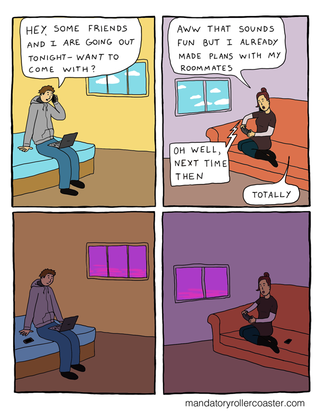
(these are just two introverts, not related to the case above! 8)

## Matching Pennies
Two people chooses a side of their coin, and then show to each other.

* If they match -> A takes/wins
* If they differ -> B takes/wins

|&nbsp; |$B_{Heads}$|$B_{Tails}$|
|-----|-----|----|
|$A_{Heads}$|+1,-1|-1,+1
|$A_{Tails}$|-1,+1|+1,-1

# Nash Equilibrium
When each player knows about the choice of the others and yet won't change their choice (i.e., they are happy with their current choice) then it is said that the game is in a Nash equilibrium, which is the most optimal solution sought. For small and simple systems, there is a simple and systematical way to find the Nash equilibrium points (there can be more than one, as we'll see). Also, Nash has proved (in his Nobel awarded work... of [2 pages](https://www.pnas.org/content/36/1/48)!) that in a complicated and within many yet finite strategies, there is always at least one Nash equilibrium (assuming a special condition that allows mixed strategies). Also, after many iterated tries (playing the same game over and over), the system is expected to reach an equilibrium however, in a [recent research, it has been shown to be not de-facto, with exceptions](https://www.quantamagazine.org/in-game-theory-no-clear-path-to-equilibrium-20170718/).

So, for simple systems such as the ones we have considered, where a 2 dimensional pay-off table is sufficient, we consider each player's stance from the other's possible choice. 

In a 2 player setup, start from one of the cells:
* Take the column player's point of view. For each of the cells in that row, compare the immediate neighbours (to the left and right) and point it towards the one with the better yield (higher pay-off). If the current cell is higher yielding, then direct the arorows towards that.
* Once you finish the comparison of the rows, then take on the role of the row player and repeat the procedure, this time considering the neighbours above and below.

## Prisoner's Dilemma

As an example, consider the payoff table for the Prisoner's Dilemma:

|&nbsp; |$B_{s}$|$B_{d}$|
|-----|-----|----|
|$A_{s}$|2,2|0,3
|$A_{d}$|3,0|1,1

Here, Alice is the column player (because it can make its choice between $A_s$ (above) and $A_d$ (below)) and Bob is the column player (as it chooses between $B_s$ (left) and $B_d$ (right))

First we take on Alice's role and let's start from the top left cell (2,2). Alice can choose to stay here (remain silent) or go to the cell below (defect). In this situation (where Bob is remaining silent) if she stays, she gains "2" but if she defects, her gain is "3" so she will choose to defect (in basic Game Theory, moral or irrational choices are excluded and maximum yield is the ultimate object). So, our chart will be marked as:

|&nbsp; |$B_{s}$|$B_{d}$|
|-----|-----|----|
|$A_{s}$|2$\color{blue}{\downarrow}$,2|0,3
|$A_{d}$|3,0|1,1

Then we move on to Bob's other possible outcome scenario (him defecting). In this case, once again defecting is the better option for Alice ("0" $\rightarrow$ "1"), so we mark the 2nd column downwards as well, pointing to the row where Alice defects:

|&nbsp; |$B_{s}$|$B_{d}$|
|-----|-----|----|
|$A_{s}$|2$\color{blue}{\downarrow}$,2|0$\color{blue}{\downarrow}$,3
|$A_{d}$|3,0|1,1

Having covered all possibilities for Alice, we now take the role of Bob: his decisions allows movement along the rows. So if he's presented with a situation where Alice is silent, he maximizes his gain by defecting ("2" $\rightarrow$ "3") and if Alice is defecting, his choice will also be defecting ("0" $\rightarrow$ "1"), so, the pay-off table will be marked as:

|&nbsp; |$B_{s}$|$B_{d}$|
|-----|-----|----|
|$A_{s}$|2$\color{blue}{\downarrow}$,2$\color{red}{\rightarrow}$|0$\color{blue}{\downarrow}$,3
|$A_{d}$|3,0$\color{red}{\rightarrow}$|1,1

More clearly:

|&nbsp; |$B_{s}$|&nbsp;|$B_{d}$|
|-----|-----|----|---|
|$A_{s}$|2,2|$\color{red}{\rightarrow}$|0,3
|&nbsp;|$\color{blue}{\downarrow}$|&nbsp;|$\color{blue}{\downarrow}$
|$A_{d}$|3,0|$\color{red}{\rightarrow}$|1,1

Even better:


From the graph above, we can see that, no matter we start, we are forced to move along the arrows and we end up at the bottom-right cell where Alice and Bob both defect. This is the Nash equilibrium point. 

From its definition, Nash equilibrium is the state where, given that the other player's choice is revealed, the player won't change their own choice. 

Consider the case that Alice is thinking of remaining silent but then she learns that Bob has defected: in that case, she'll also defect. The same goes for Bob -- for any of Alice's possible choices, himself defecting is the most rewarding, so he will always defect. Both of them defecting is the **only** case where upon learning other's intentions, they will not change their selection.

## Stag Hunt
Let's find Nash equilibrium point (or points, or if there's any) for the Stag Hunt whose payoff table was as follows:

|&nbsp; |$B_{stag}$|$B_{hare}$|
|-----|-----|----|
|$A_{stag}$|2,2|0,1
|$A_{hare}$|1,0|1,1

A determines the movement along (within) the columns whereas B determines the movement along the rows, so we place our arrows accordingly:

|&nbsp; |$B_{stag}$|&nbsp;|$B_{hare}$|
|-----|-----|----|---|
|$A_{stag}$|2,2|$\color{red}{\leftarrow}$|0,1
|&nbsp;|$\color{blue}{\uparrow}$|&nbsp;|$\color{blue}{\downarrow}$
|$A_{hare}$|1,0|$\color{red}{\rightarrow}$|1,1



The situation is like this: if A learns that B is going for a stag hunt, she will also opt to go to the stag hunt. If she hears that B is off to hare hunt, she will also choose to go the hare hunting. The same goes for B: If he chooses to go for stag hunting but then learns that A is going for hare hunting, he will change his opinion and will go to hare hunting as well. If he had chosen hare hunting but now learns that A is going for stag hunting, he will also go.

We see that, following the arrows, once we reach the top-left or bottom-right cells, we stay there. This means that in this game, we actually have 2 Nash equilibrium points.

## Matching Pennies

|&nbsp; |$B_{Heads}$|&nbsp;|$B_{Tails}$|
|-----|-----|----|----|
|$A_{Heads}$|+1,-1|$\color{red}{\rightarrow}$|-1,+1
|&nbsp;|$\color{blue}{\uparrow}$|&nbsp;|$\color{blue}{\downarrow}$
|$A_{Tails}$|-1,+1|$\color{red}{\leftarrow}$|+1,-1



For this game, as can be seen from the figure, there is no Nash equilibrium point - in no possible outcome can the competing parties leave the game satisfied.

# References
* John Nash, "Equilibrium points in n-person games" _PNAS_ 36(1) 48-49 1950
https://doi.org/10.1073/pnas.36.1.48
* Erica Klarreich, "In Game Theory, No Clear Path to Equilibrium" *Quanta Magazine* 18 July 2017  
https://www.quantamagazine.org/in-game-theory-no-clear-path-to-equilibrium-20170718/
* Yakov Babichenko, Aviad Rubinstein, "Communication complexity of approximate Nash equilibria" *arXiv* 2016  
https://arxiv.org/abs/1608.06580
* Prof. Asu Ozdaglar's "Game Theory with Engineering Applications" *MIT Course on OpenCourseWare*  
https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-254-game-theory-with-engineering-applications-spring-2010/
